# Letters

## Description

Generate an image with the edges of the letters present in this noisy image


## Group ID

Identify your group here, including the number and name of each group's member

In [238]:
import cv2
# to install cv2 use: pip install opencv-python
import matplotlib.pyplot as plt 
import numpy as np

In [239]:
def binarize_image(image, threshold=127):
    # Convert the image to grayscale if it's not already in grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    return binary_image

(400, 600)


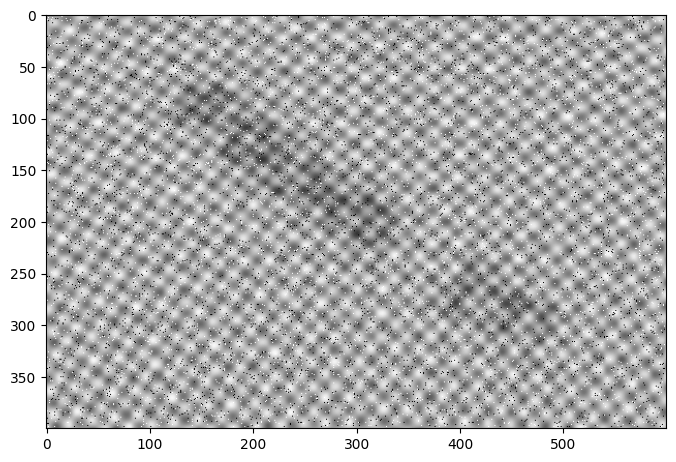

In [240]:
fname = 'Letters-noisy.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
W,H=img.shape
print(img.shape)
ratio=H/W
fig = plt.figure(figsize=(8,8*ratio))
plt.imshow(img, cmap='gray')

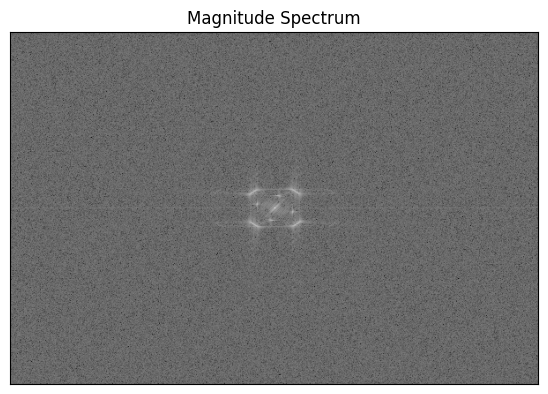

In [241]:
fname = 'Letters-noisy.png'
img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
magnitude_spectrum = 20*np.log(magnitude_spectrum)

fig = plt.figure(figsize=(15,5))
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()   

In [242]:
# manually filter high frequencies using our own ILPF
rows, cols = img.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 1, remaining all zeros
ILPF_mask = np.zeros((rows, cols, 2), np.uint8)
# filter width and heigth
divider = 24
frows = rows//divider
fcols = cols//divider
ILPF_mask[crow-frows:crow+frows, ccol-fcols:ccol+fcols] = (1,1)
#ILPF_mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
dft_masked = dft_shift*ILPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


In [243]:
# manually filter high frequencies using our own ILPF
rows, cols = img.shape
crow, ccol = rows//2 , cols//2     # center

# create a mask first, center square is 0, remaining all ones
IHPF_mask = np.ones((rows, cols, 2), np.uint8)
# build from ILPF_mask
IHPF_mask = ILPF_mask

# apply mask and inverse DFT
dft_masked = dft_shift*IHPF_mask
# do not forget to undo the centering of the transform
dft_masked_ishift = np.fft.ifftshift(dft_masked)
img_back = cv2.idft(dft_masked_ishift)

# img_back should only have real values
# but let's make sure due to rounding and representation errors
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [244]:
# compute the frequency spectrum of the MASKED_DFT, 
# just for display purposes
# module of the complex value
filtered_spectrum = cv2.magnitude(dft_masked[:,:,0],dft_masked[:,:,1])
# compute the logarith of magnitude such that smaller values are visible
filtered_spectrum = 20*np.log(filtered_spectrum+0.0001)
# compute the frequency spectrum of the MASK, 
# just for display purposes
# module of the complex value
mask_spectrum = np.sqrt(np.power(IHPF_mask[:,:,0],2)+np.power(IHPF_mask[:,:,1],2))
# compute the logarith of magnitude such that smaller values are visible
mask_spectrum = 20*np.log(mask_spectrum+0.0001)

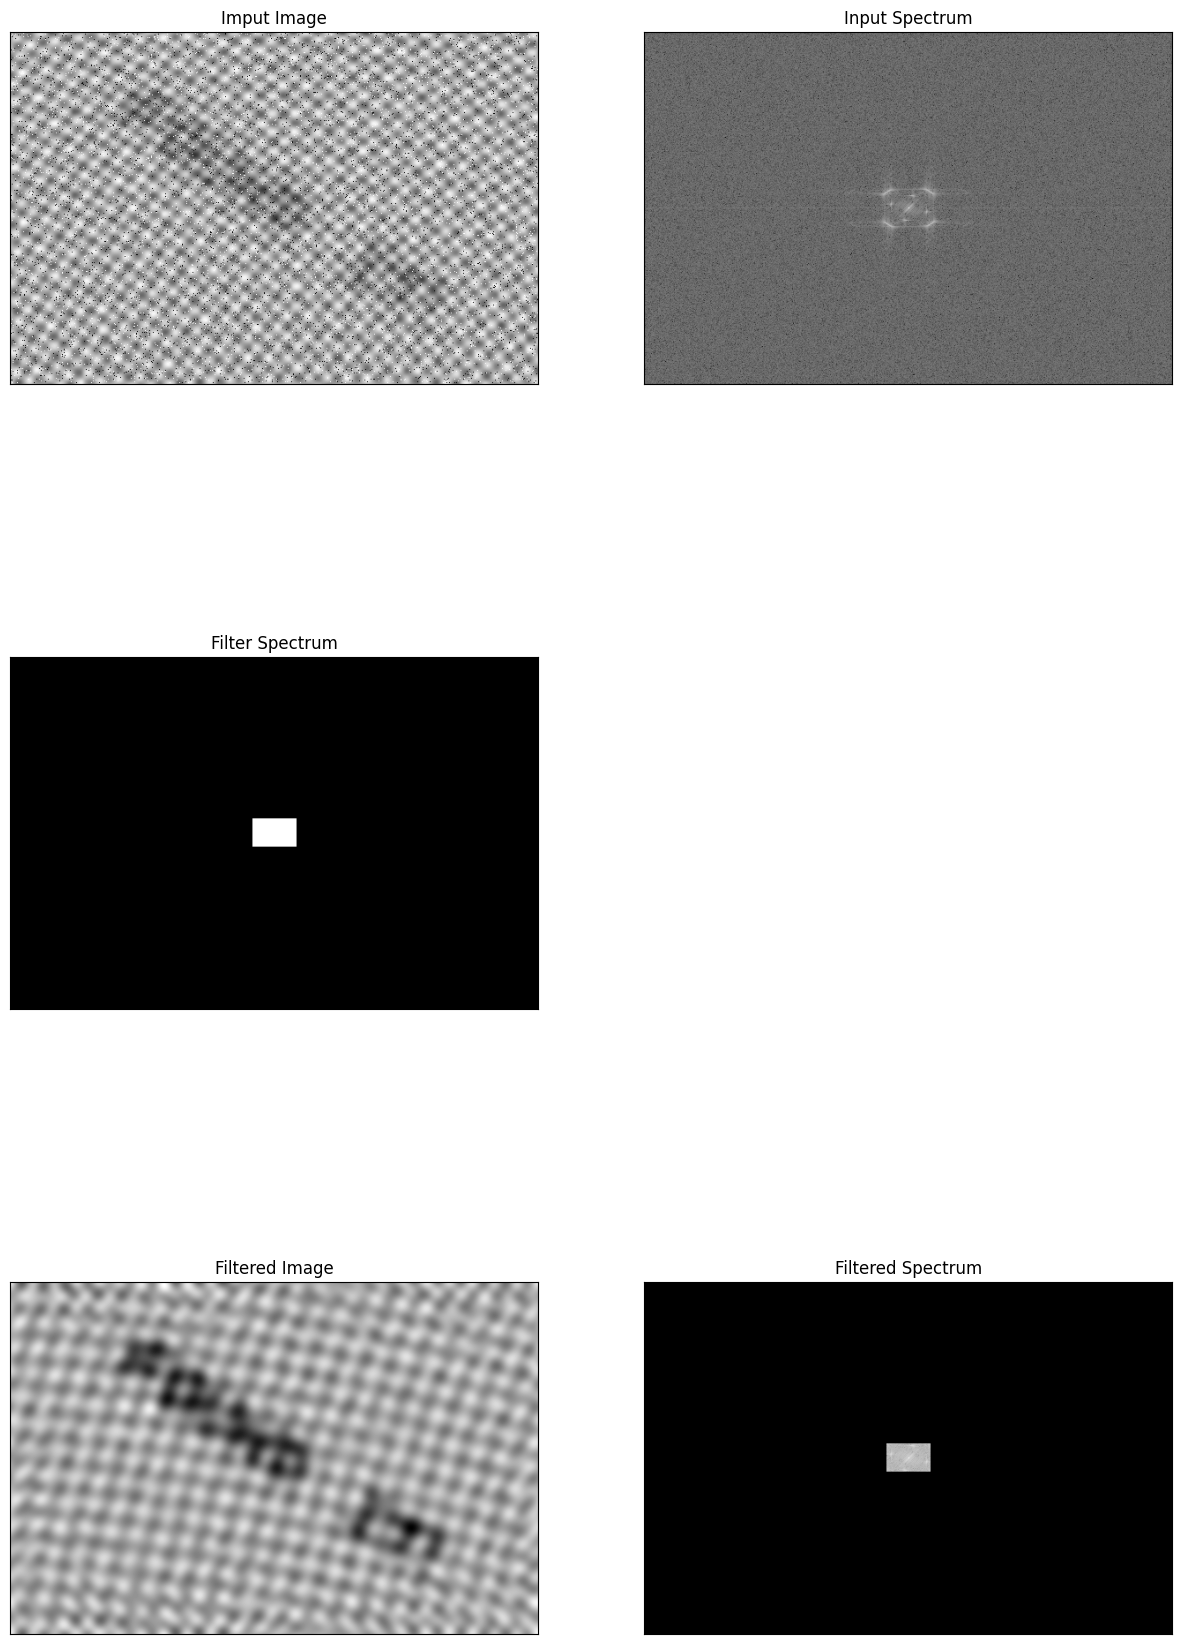

In [245]:
# display the image and the spectrum
fig = plt.figure(figsize=(15,23))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Imput Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Input Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(mask_spectrum, cmap = 'gray')
plt.title('Filter Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(filtered_spectrum, cmap = 'gray')
plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

In [246]:
threshold_value = 255

    # Binarize the transformed image
binary_image = binarize_image(img_back, threshold_value)

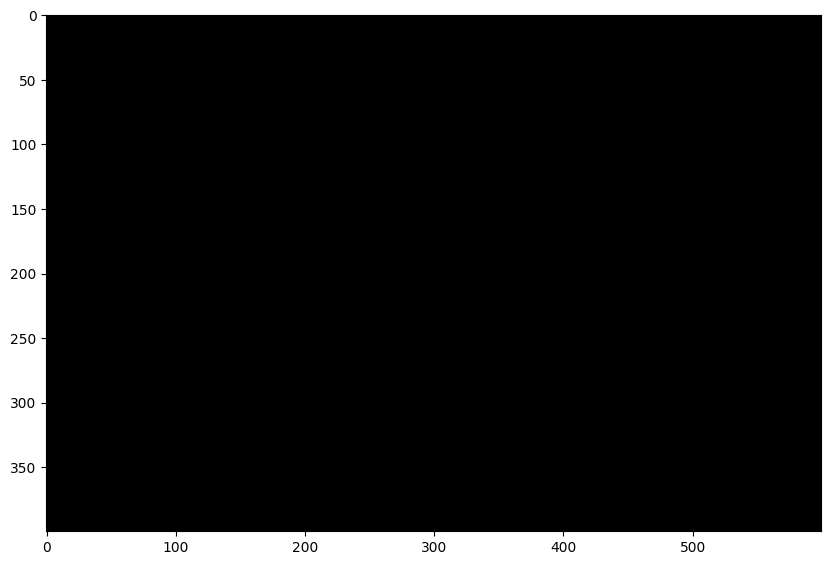

In [247]:
# OpenCV Local Denoising Filter 
denoised_image = cv2.fastNlMeansDenoising(img,None,10,10,20)
fig = plt.figure(figsize=(10,10*ratio))
plt.imshow(binary_image, cmap='gray')

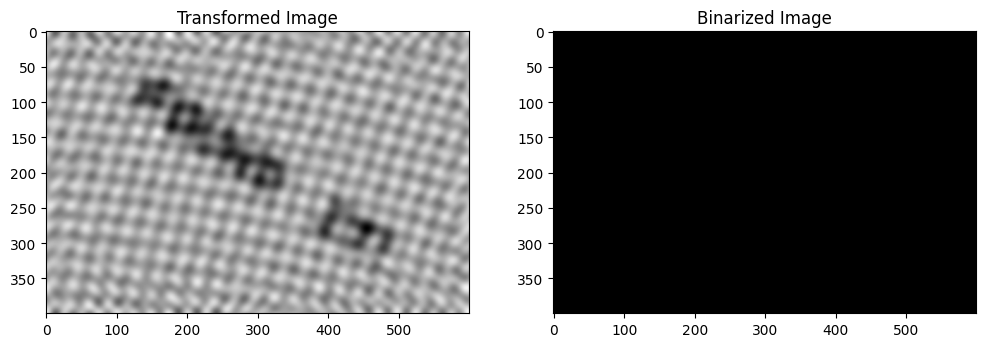

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_back, cmap='gray')
axes[0].set_title('Transformed Image')
axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binarized Image')
plt.show()

Histogram sum is zero. Cannot normalize.


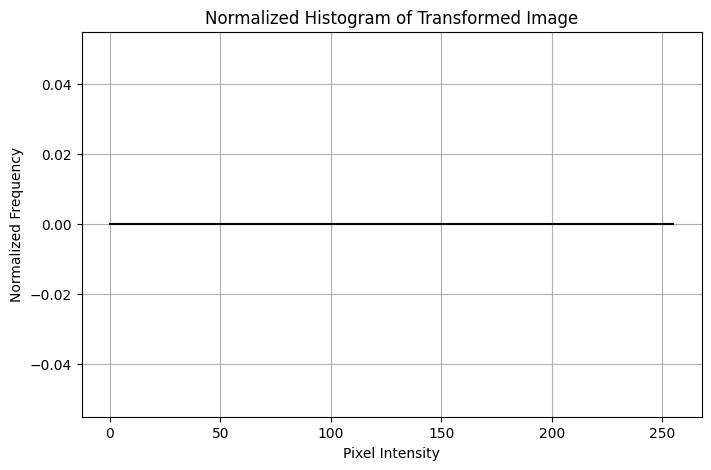

In [249]:
histogram = cv2.calcHist([img_back], [0], None, [256], [0, 256])

# Ensure histogram is a numpy array
histogram = np.squeeze(histogram)

# Normalize the histogram, handling potential division by zero
histogram_sum = histogram.sum()
if histogram_sum > 0:
    histogram /= histogram_sum
else:
    print("Histogram sum is zero. Cannot normalize.")

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(histogram, color='black')
plt.title('Normalized Histogram of Transformed Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()